## Toy Cars Dataset

In [158]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegressionCV

In [159]:
df = pd.read_csv('Cars93.csv')
y = df['MPG.city']
X = df[['Weight']]

seed = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=seed)

In [160]:
clf = svm.SVR()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.predict([[2000]]))


0.46263574955155773
[26.50806881]


c:\Users\zach3\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Residuals of SVM Model')

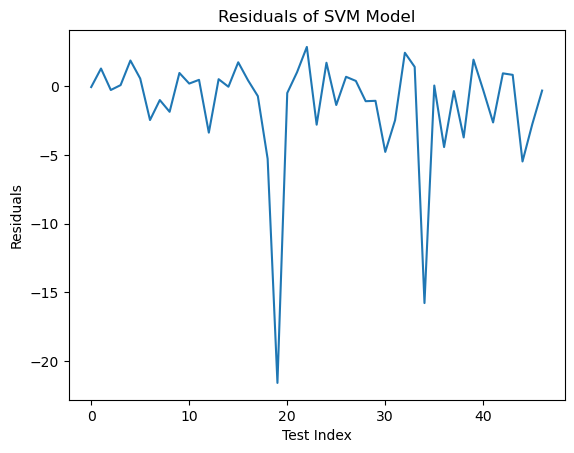

In [161]:
y_hat = clf.predict(X_test)
residuals = y_hat - y_test
plt.plot(range(len(y_test)), residuals)
plt.ylabel("Residuals")
plt.xlabel("Test Index")
plt.title("Residuals of SVM Model")


In [162]:
clf.predict([[10]])

c:\Users\zach3\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([21.81470124])

In [163]:
df = pd.read_csv('Cars93.csv')
yp = df['Max.Price']
zp = df['MPG.highway']
y = df[['Weight']]
X = df[['MPG.highway', 'Max.Price']]

X.head()


,MPG.highway,Max.Price
0,31,18.8
1,25,38.7
2,26,32.3
3,26,44.6
4,30,36.2


In [164]:
seed = 20
X_train, X_test, y_train, y_test= train_test_split(X[['MPG.highway', 'Max.Price']], y[['Weight']], test_size=0.5, random_state=seed)
#X_train, X_test#, y_train, y_test, z_train, z_test

In [165]:
clf = svm.SVR(C=100)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.support_)
print(clf.n_support_)

0.6639118356416867
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
[46]


c:\Users\zach3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [166]:
#MPG Highway and max price
p = clf.predict([[40, 20]])
print(p)

[2713.8351224]


c:\Users\zach3\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


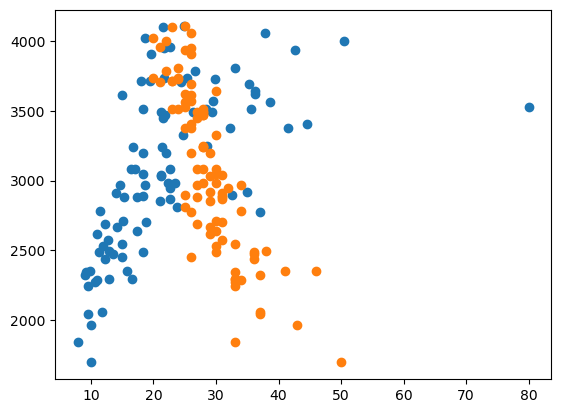

In [167]:
plt.scatter(yp, y)
plt.scatter(zp, y)

In [168]:
pd.set_option('display.max_columns', None)

cars = pd.read_csv("Cars93.csv")
cars.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [169]:
# drop columns that are not relevant or are missing data
drop_columns = ['Manufacturer','Model', 'Make', 'Luggage.room', 'Rear.seat.room', 'Min.Price', 'Max.Price', 'Unnamed: 0']
cars.drop(drop_columns, axis = 1, inplace = True)

# fix the Cylinders column to be integer
cars.replace('rotary', 4, inplace=True)
cars.Cylinders = cars.Cylinders.astype('int64')

# set up dummy variables for dataset
dummies = ['Type', 'AirBags', 'DriveTrain', 'Man.trans.avail', 'Origin']
cars_clean = pd.get_dummies(cars, columns = dummies)

# scale the data so each column is [0, 1]
for column in cars_clean.columns:
    cars_clean[column] = cars_clean[column] / cars_clean[column].abs().max()

In [170]:
# set up X without target variable, make y only target
X = cars_clean.drop("MPG.highway", axis = 1)
y = cars_clean["MPG.highway"]

# set seed for reproducibility, then create training and testing splits
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = seed)

In [171]:
# build, fit, and score svm (SVR) model
svr_model = svm.SVR(C = 1000)
svr_model.fit(X_train, y_train)
svr_model.score(X_train, y_train), svr_model.score(X_test, y_test)

(0.4929464480575443, 0.3970202360619455)

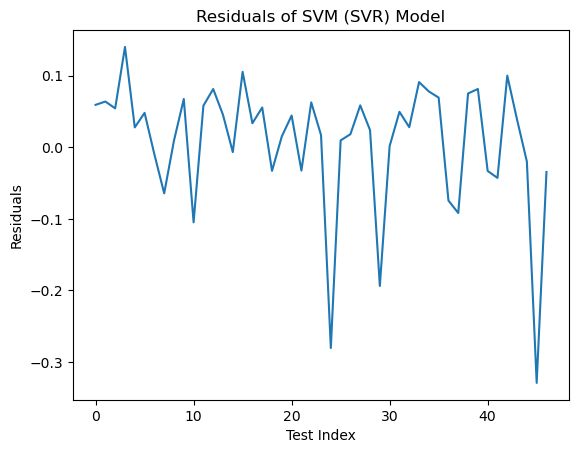

In [172]:
# get and plot residuals
y_hat = svr_model.predict(X_test)
residuals = y_hat - y_test
plt.plot(range(len(y_test)), residuals)
plt.ylabel("Residuals")
plt.xlabel("Test Index")
plt.title("Residuals of SVM (SVR) Model");

In [173]:
# build, fit, and score svm (LinearSVR) model
lsvr_model = svm.LinearSVR(C = 1000, random_state=seed)
lsvr_model.fit(X_train, y_train)
lsvr_model.score(X_train, y_train), lsvr_model.score(X_test, y_test)

c:\Users\zach3\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(0.9376797190900816, 0.8780485860823071)

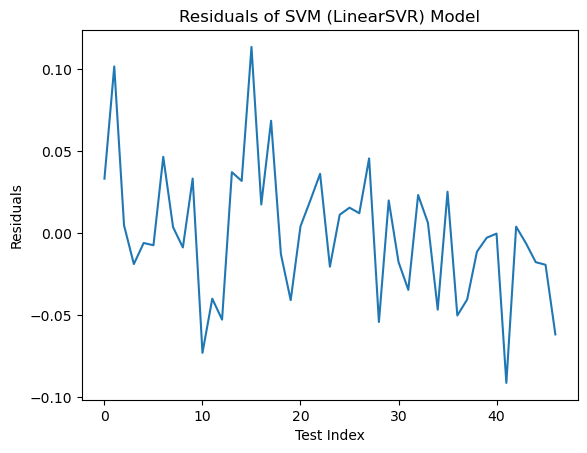

In [174]:
# get and plot residuals
y_hat = lsvr_model.predict(X_test)
residuals = y_hat - y_test
plt.plot(range(len(y_test)), residuals)
plt.ylabel("Residuals")
plt.xlabel("Test Index")
plt.title("Residuals of SVM (LinearSVR) Model");

In [175]:
# build, fit, and score svm (LinearSVR) model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9488869839811838, 0.8679076018005857)

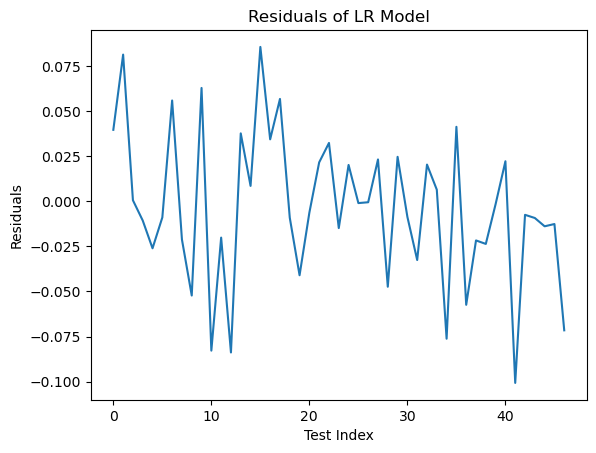

In [176]:
# get and plot residuals
y_hat = lr.predict(X_test)
residuals = y_hat - y_test
plt.plot(range(len(y_test)), residuals)
plt.ylabel("Residuals")
plt.xlabel("Test Index")
plt.title("Residuals of LR Model");

## Books.csv

In [177]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import pandas as pd

In [178]:
df = pd.read_csv('Books.csv')

y = df['ratings_1']
X = df[['ratings_2']]

seed = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
#X_train, X_test, y_train, y_test 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(8000, 1) (2000, 1) (8000,) (2000,)


In [179]:
clf = svm.SVR(C=1000)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.8495676239680213


In [180]:
print(clf.predict([[20]]))

[36.35291666]


c:\Users\zach3\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Residuals of SVM Model')

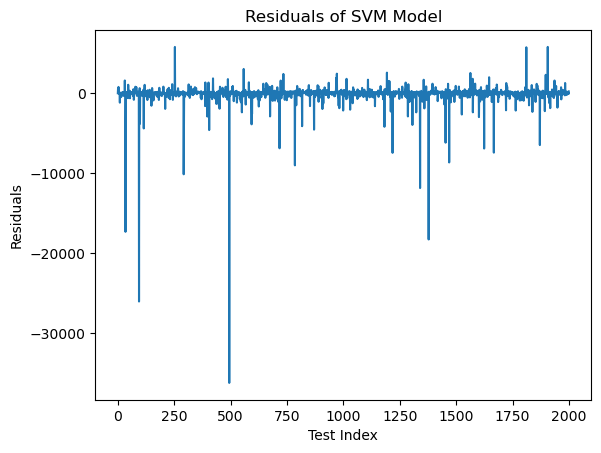

In [181]:
y_hat = clf.predict(X_test)
residuals = y_hat - y_test
plt.plot(range(len(y_test)), residuals)
plt.ylabel("Residuals")
plt.xlabel("Test Index")
plt.title("Residuals of SVM Model")


In [182]:
y_test.iloc[494]

60427

## Iris

In [183]:
df = pd.read_csv('Iris.csv')

y = df['PetalWidthCm']
X = df[['PetalLengthCm']]

seed = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)
#X_train, X_test, y_train, y_test 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(90, 1) (60, 1) (90,) (60,)


In [184]:
clf = svm.SVR()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9050620058414254


In [185]:
print(clf.predict([[1]]))

[0.30005478]


c:\Users\zach3\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [186]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [187]:
# replace target variable text with corresponding numbers
iris.replace("Iris-setosa", 0, inplace=True)
iris.replace("Iris-versicolor", 1, inplace=True)
iris.replace("Iris-virginica", 2, inplace=True)

# get a dataframe to hold scaled data
iris_scaled = iris

# scale the data columns to [0, 1] range
for column in iris.columns[0:-1]:
    iris_scaled[column] = iris_scaled[column] / iris_scaled[column].abs().max()

iris_scaled.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.006667,0.645570,0.795455,0.202899,0.08,0
1,0.013333,0.620253,0.681818,0.202899,0.08,0
2,0.020000,0.594937,0.727273,0.188406,0.08,0
3,0.026667,0.582278,0.704545,0.217391,0.08,0
4,0.033333,0.632911,0.818182,0.202899,0.08,0


In [188]:
# set X to data without target and set y to target series
X = iris_scaled.drop("Species", axis=1)
y = iris_scaled["Species"]

# set seed and get test/train split
seed = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = seed)

In [189]:
# build, fit and score svm (SVC) model
svc_model = svm.SVC(C=1)
svc_model.fit(X_train, y_train)
svc_model.score(X_train, y_train), svc_model.score(X_test, y_test)

(1.0, 0.9833333333333333)

In [190]:
# get the predictions from the model
y_hat = svc_model.predict(X_test)

# show confusion matrix on test set classifications
confusion_mx = confusion_matrix(y_test, y_hat)
confusion_mx

array([[20,  0,  0],
       [ 0, 22,  0],
       [ 0,  1, 17]], dtype=int64)

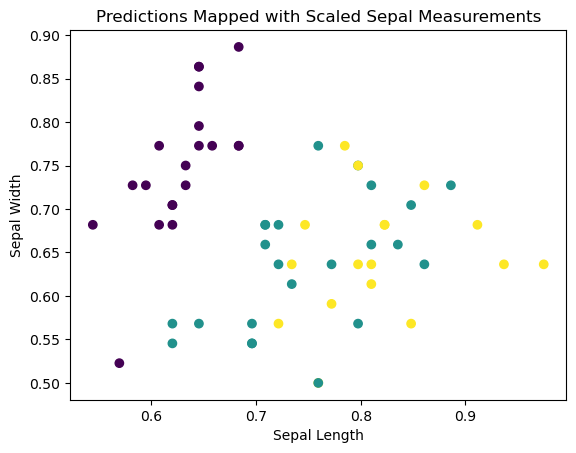

In [191]:
# plot the test set by Sepal Measurements, decide color based on predictions
plt.scatter(x = X_test["SepalLengthCm"], y = X_test["SepalWidthCm"], c=y_hat)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Predictions Mapped with Scaled Sepal Measurements");

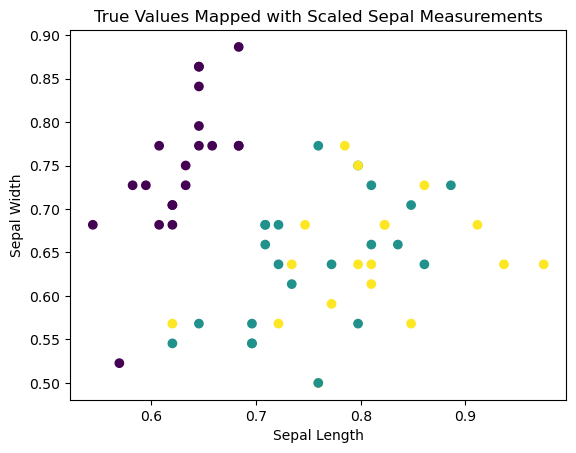

In [192]:
# plot the test set by Sepal Measurements, decide color based on actual results
plt.scatter(x = X_test["SepalLengthCm"], y = X_test["SepalWidthCm"], c=y_test)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("True Values Mapped with Scaled Sepal Measurements");

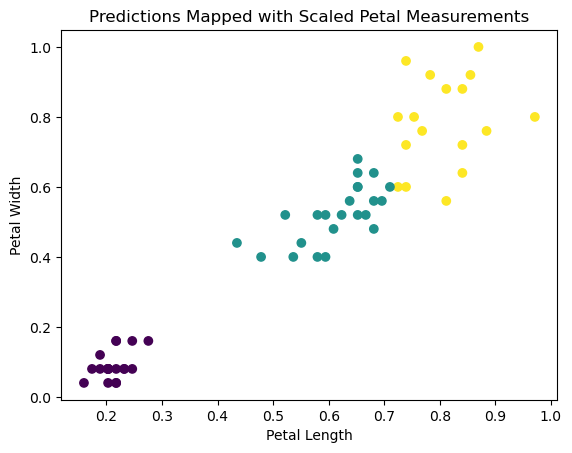

In [193]:
# plot the test set by Petal Measurements, decide color based on predictions
plt.scatter(x = X_test["PetalLengthCm"], y = X_test["PetalWidthCm"], c=y_hat)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Predictions Mapped with Scaled Petal Measurements");

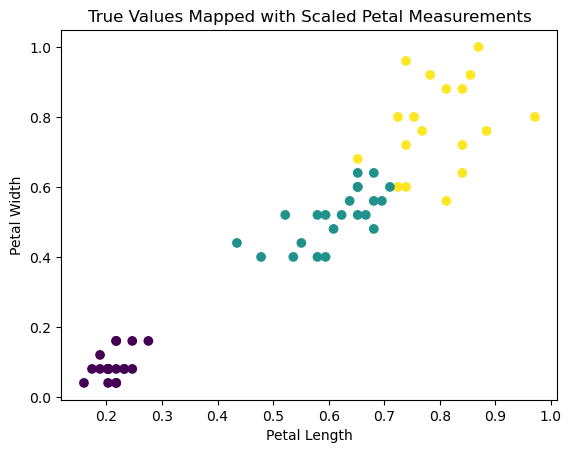

In [194]:
# plot the test set by Petal Measurements, decide color based on actual results
plt.scatter(x = X_test["PetalLengthCm"], y = X_test["PetalWidthCm"], c=y_test)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("True Values Mapped with Scaled Petal Measurements");

In [198]:
# build, fit, and score log regression model
log = LogisticRegressionCV(cv = 5, random_state = seed, verbose=False)
log.fit(X_train, y_train)
log.score(X_train, y_train),  log.score(X_test, y_test)

(1.0, 0.9833333333333333)

In [197]:
# get the predictions from the model
y_hat = log.predict(X_test)

# show confusion matrix on test set classifications
confusion_mx = confusion_matrix(y_test, y_hat)
confusion_mx

array([[20,  0,  0],
       [ 0, 22,  0],
       [ 0,  1, 17]], dtype=int64)